# C&S Bio M185 Project -- Woodpeckers

### Introduction
The paper we are exploring is titled the “Migratory strategy drives species-level variation in bird sensitivity to vegetation green-up,” which focuses on studying the migratory pattern of birds across different species and latitudes, specifically in relation to vegetation green-up. Researchers looked at spring migration patterns for 56 bird species across eastern North America from 2002 to 2017, ultimately finding that changes in the spring arrival of migratory birds are synchronized with fluctuations in vegetation green-up, and within species, there exists a strong latitudinal gradient in sensitivity to green-up.

### Primary Question
How do fire frequency patterns drive variation in sensitivity of bird arrival to vegetation green-up for the
Setophaga striata?

## Reading in datasets
Here we read in the datasets we need to analyze the relationship between fire frequency and bird arrival. The two main datasets are the following:
* 'data_sensi.csv' -- This file contains the data associated with species sensitivity to green up provided by the research paper. Visit [this link](https://zenodo.org/record/4549910#.Yhwo_i1h1R6) to find this data file along with all the other data from the paper.
* 'fire_data.csv' -- This file contains fire cover data from NASA-FIRMS. Visit [this link](https://firms.modaps.eosdis.nasa.gov/data/download/DL_FIRE_J1V-C2_251815.zip) to download the data and learn more about the file.

In [79]:
import pandas as pd

bird = pd.read_csv('data_sensi.csv')
fire = pd.read_csv('fire_data.csv')

## Learning about the data
Here we will learn more about the data before our analysis

In [80]:
bird = bird.drop('Unnamed: 0', 1)
bird.head()

,sci_name,species,cell,cell_lat,cell_lng,beta_mean,beta_sd,xi_mean,xi_sd,gamma_mean,gamma_sd
0,Archilochus_colubris,Ruby-throated Hummingbird,452,52.48,-94.42,0.137649,0.086264,0.004206,0.022077,0.011857,0.004675
1,Archilochus_colubris,Ruby-throated Hummingbird,480,50.79,-91.68,0.116928,0.067593,0.004206,0.022077,0.011857,0.004675
2,Archilochus_colubris,Ruby-throated Hummingbird,485,51.49,-69.98,0.141127,0.074993,0.004206,0.022077,0.011857,0.004675
3,Archilochus_colubris,Ruby-throated Hummingbird,486,50.79,-65.82,0.133372,0.073188,0.004206,0.022077,0.011857,0.004675
4,Archilochus_colubris,Ruby-throated Hummingbird,487,49.98,-61.82,0.123801,0.072981,0.004206,0.022077,0.011857,0.004675


Let's only look at entries of species name Setophaga striata and see how many different entries there are

In [61]:
seto = bird[bird['sci_name'] == 'Setophaga_striata']
seto.shape

(103, 11)

There seems to be 103 entries for Setophaga striata

In [85]:
seto.head()

,sci_name,species,cell,cell_lat,cell_lng,beta_mean,beta_sd,xi_mean,xi_sd,gamma_mean,gamma_sd
2580,Setophaga_striata,Blackpoll Warbler,370,59.11,-94.68,0.266711,0.184600,0.162615,0.038177,0.0086,0.005451
2581,Setophaga_striata,Blackpoll Warbler,398,57.40,-91.43,0.252864,0.144257,0.162615,0.038177,0.0086,0.005451
2582,Setophaga_striata,Blackpoll Warbler,402,58.04,-70.98,0.285263,0.133500,0.162615,0.038177,0.0086,0.005451
2583,Setophaga_striata,Blackpoll Warbler,403,57.40,-66.07,0.280069,0.128007,0.162615,0.038177,0.0086,0.005451
2584,Setophaga_striata,Blackpoll Warbler,404,56.62,-61.38,0.273203,0.129886,0.162615,0.038177,0.0086,0.005451


## Data Cleaning and Preprocessing

Here, we figure out the maximum and minimum longitudes and latitudes of the Setophaga striata dataset so that we can only focus on the fires in the region of interest

In [62]:
max_lng = max(seto['cell_lng'])
min_lng = min(seto['cell_lng'])

In [63]:
max_lat = max(seto['cell_lat'])
min_lat = min(seto['cell_lat'])

In [64]:
fire.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,37.26637,-82.17396,297.1,0.46,0.39,2019-12-04,700,1,VIIRS,n,2.0NRT,269.6,0.5,N
1,37.23580,-82.04366,316.8,0.46,0.39,2019-12-04,700,1,VIIRS,n,2.0NRT,271.8,2.2,N
2,34.34780,-78.76134,299.9,0.38,0.36,2019-12-04,700,1,VIIRS,n,2.0NRT,266.0,0.7,N
3,37.86549,-83.15558,325.3,0.51,0.41,2019-12-04,700,1,VIIRS,n,2.0NRT,272.3,2.8,N
4,37.86617,-83.16152,295.2,0.51,0.41,2019-12-04,700,1,VIIRS,n,2.0NRT,270.6,2.1,N


Here, we restrict our fire dataset based on the max/min longitudes and latitudes

In [65]:
fire = fire[fire['longitude'] > min_lng]
fire = fire[fire['longitude'] < max_lng]
fire = fire[fire['latitude'] > min_lat]
fire = fire[fire['latitude'] < max_lat]
fire.shape

(329791, 14)

Here, we splice the Setophaga striata dataset and only keep the longitude and latitude columns (we will refer to this as the *cell dataset*, but it is represented in the code as *lat_long*). Then, we clean the cell dataset (resetting entries, getting rid of potential duplicates) and add a column for the fire cover.

In [70]:
lat_long = seto[['cell_lng', 'cell_lat']]
print(lat_long.shape)
lat_long.drop_duplicates(keep = 'first', inplace = True, ignore_index=True)
print(lat_long.shape)
lat_long['fire_cover'] = 0
print(lat_long)

(103, 2)
(103, 2)
     cell_lng  cell_lat  fire_cover
0      -94.68     59.11           0
1      -91.43     57.40           0
2      -70.98     58.04           0
3      -66.07     57.40           0
4      -61.38     56.62           0
..        ...       ...         ...
98     -86.18     29.40           0
99     -83.72     30.23           0
100    -81.24     31.00           0
101    -81.60     28.22           0
102    -81.52     25.98           0

[103 rows x 3 columns]


<ipython-input-70-a7e2e7f4ed1a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_long.drop_duplicates(keep = 'first', inplace = True, ignore_index=True)
<ipython-input-70-a7e2e7f4ed1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_long['fire_cover'] = 0


We go through each entry in the fire dataset and compare it to every centroid given in the cell dataset to find out which cell a certain fire is closest to. We then subsequently increase the fire cover count of that specific centroid in the cell dataset (in the fire_cover column).

In [71]:
#For every pair of longitudes and latitudes from the fire dataset, this function compares it to the
#centroids of all the cells by calling the dist_from_cell function and then increments the cell with
#the least distance away from the fire
def call_dist_from_cell(longitude, latitude):
    
    dists = lat_long.apply(lambda x: dist_from_cell(x.cell_lng, x.cell_lat, longitude, latitude), axis=1)
    minDist = min(dists)
    minInd = dists[dists == minDist].index[0]
    lat_long.iat[minInd, 2]+=1
    
#This function returns the distance between the fire and the center of a certain cell.
def dist_from_cell(cell_lng, cell_lat, lng, lat):
        dist = (lat-cell_lat)**2 + (lng-cell_lng)**2
        return dist

In [72]:
#Calls call_dist_from_cell for every pair of longitudes and latitudes in the fire dataset
fire.apply(lambda x: call_dist_from_cell(x.longitude, x.latitude), axis=1)
lat_long.head()

,cell_lng,cell_lat,fire_cover
0,-94.68,59.11,0
1,-91.43,57.40,0
2,-70.98,58.04,0
3,-66.07,57.40,0
4,-61.38,56.62,0


In [73]:
#Export the cell dataset to a csv file
lat_long.to_csv("lat_long.csv", index = False)

Let's see the number of unique fire cover values in our cell dataset:

In [74]:
print(lat_long['fire_cover'].value_counts())

0        47
59        1
4145      1
48        1
175       1
4525      1
39        1
929       1
32        1
3871      1
10142     1
20637     1
284       1
5960      1
10264     1
23        1
3989      1
10900     1
1299      1
1554      1
13440     1
5722      1
4107      1
649       1
5         1
3         1
18689     1
15288     1
12002     1
7803      1
36001     1
121       1
2293      1
2932      1
5106      1
1905      1
6219      1
2027      1
15207     1
4798      1
6499      1
23522     1
93        1
4316      1
4314      1
468       1
4432      1
21439     1
6605      1
3787      1
3400      1
3961      1
1732      1
707       1
320       1
831       1
10173     1
Name: fire_cover, dtype: int64


## Analysis and Graphs

First, let's merge our cell dataset (lat_long) with the Setophaga striata dataset (seto)

In [77]:
merged_seto = pd.merge(left = seto, right = lat_long, how = 'inner', on = ['cell_lng', 'cell_lat'])
merged_seto.head()

,sci_name,species,cell,cell_lat,cell_lng,beta_mean,beta_sd,xi_mean,xi_sd,gamma_mean,gamma_sd,fire_cover
0,Setophaga_striata,Blackpoll Warbler,370,59.11,-94.68,0.266711,0.184600,0.162615,0.038177,0.0086,0.005451,0
1,Setophaga_striata,Blackpoll Warbler,398,57.40,-91.43,0.252864,0.144257,0.162615,0.038177,0.0086,0.005451,0
2,Setophaga_striata,Blackpoll Warbler,402,58.04,-70.98,0.285263,0.133500,0.162615,0.038177,0.0086,0.005451,0
3,Setophaga_striata,Blackpoll Warbler,403,57.40,-66.07,0.280069,0.128007,0.162615,0.038177,0.0086,0.005451,0
4,Setophaga_striata,Blackpoll Warbler,404,56.62,-61.38,0.273203,0.129886,0.162615,0.038177,0.0086,0.005451,0


The only columns that matter to us is the beta_mean and fire_cover, so we will splice these out

In [89]:
seto_beta_fire = merged_seto[['beta_mean', 'xi_mean', 'gamma_mean', 'fire_cover']]
seto_beta_fire.head()

,beta_mean,xi_mean,gamma_mean,fire_cover
0,0.266711,0.162615,0.0086,0
1,0.252864,0.162615,0.0086,0
2,0.285263,0.162615,0.0086,0
3,0.280069,0.162615,0.0086,0
4,0.273203,0.162615,0.0086,0


Here, we will plot the fire cover against the beta sensitivity and look at the correlation between them

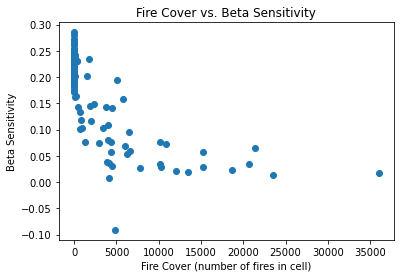

In [95]:
import matplotlib.pyplot as plt
plt.scatter(seto_beta_fire['fire_cover'], seto_beta_fire['beta_mean'])
plt.title('Fire Cover vs. Beta Sensitivity')
plt.xlabel('Fire Cover (number of fires in cell)')
plt.ylabel('Beta Sensitivity')
#Saving the figure as a p
plt.savefig('fc_vs_beta.png')

In [84]:
seto_beta_fire.corr()

,beta_mean,fire_cover
beta_mean,1.000000,-0.695117
fire_cover,-0.695117,1.000000


## Conclusions

Looking at the plot of fire cover vs. beta sensitivity, there seems to be a notable downward trend in beta sensitivity as fire cover increases. This is supported by the calculated correlation coefficient of -0.695117. Hence, we can conclude that there is a moderately strong negative correlation between fire cover and beta sensitivity of green-up on arrival for the Setophaga striata. This means that in locations of high fire cover, green-up plays a lesser role in determining the time of arrival after migration for the Setophaga striata. Likewise, areas of low fire cover see the Setophaga sync their arrival time to green-up at a much higher degree.

